In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("index.csv")

In [3]:
X = df.drop(columns = ["Creditability"])
y = df['Creditability']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [6]:
train_x=sc.fit_transform(X_train)
test_x=sc.fit_transform(X_test)

In [7]:
X_train = train_x
X_test = test_x

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [13]:
epochs = 2
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,569
Trainable params: 5,505
Non-trainable params: 64
___________________________________________________

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 670 samples, validate on 330 samples
Epoch 1/2
670/670 [==============================] - 3s 5ms/sample - loss: 0.7176 - accuracy: 0.5328 - val_loss: 0.6907 - val_accuracy: 0.5758
Epoch 2/2
670/670 [==============================] - 0s 498us/sample - loss: 0.7194 - accuracy: 0.5224 - val_loss: 0.6890 - val_accuracy: 0.6576


In [17]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.49951282],
       [0.5059244 ],
       [0.51092327],
       [0.50444627],
       [0.49722722],
       [0.50104135],
       [0.5000357 ],
       [0.50875443],
       [0.5060254 ],
       [0.5025681 ],
       [0.50752604],
       [0.5007153 ],
       [0.5051992 ],
       [0.50780046],
       [0.51294774],
       [0.50932795],
       [0.5103603 ],
       [0.51022565],
       [0.5017758 ],
       [0.50342315],
       [0.50542265],
       [0.49562234],
       [0.5075791 ],
       [0.5090464 ],
       [0.5042642 ],
       [0.5064531 ],
       [0.51089877],
       [0.5054694 ],
       [0.49928054],
       [0.5051818 ],
       [0.5003625 ],
       [0.50163394],
       [0.50169617],
       [0.5082048 ],
       [0.5115789 ],
       [0.50754166],
       [0.5143276 ],
       [0.49782434],
       [0.50907886],
       [0.5076088 ],
       [0.50484854],
       [0.5118314 ],
       [0.5114018 ],
       [0.5083698 ],
       [0.5066297 ],
       [0.50645715],
       [0.50817883],
       [0.509

In [18]:
Y_pred = (Y_pred > 0.5)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
cm_lstm = confusion_matrix(y_test, Y_pred)

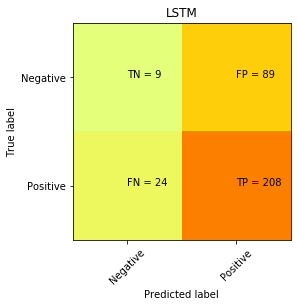

In [21]:
plt.clf()
plt.imshow(cm_lstm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('LSTM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_lstm[i][j]))
plt.show()

In [22]:
precision_ann = precision_score(y_test, Y_pred)
print("precision = "+str(precision_ann))
recall_ann = recall_score(y_test, Y_pred)
print("recall = "+ str(recall_ann))
accuracy_ann = accuracy_score(y_test, Y_pred)
print("accuracy = "+ str(accuracy_ann))
F1_score_ann = f1_score(y_test, Y_pred)
print("F1 Score = "+ str(F1_score_ann))

precision = 0.7003367003367004
recall = 0.896551724137931
accuracy = 0.6575757575757576
F1 Score = 0.7863894139886579


In [23]:
tn, fp, fn, tp = cm_lstm.ravel()

In [24]:
specificity = (tn)/(tn+fp)
print("specificity ="+ str(specificity))

specificity =0.09183673469387756


In [ ]:
import pandas as pd

df = pd.read_csv("index.csv")

df.head()

X = df.drop(columns = ["Creditability"])
y = df['Creditability']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

train_x=sc.fit_transform(X_train)
test_x=sc.fit_transform(X_test)

X_train = train_x
X_test = test_x

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape

y_train = y_train.to_numpy()

y_train

y_test = y_test.to_numpy()

y_test

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

#BatchNormalization() -> DIVIDE INTO MINI BATCHED AND STANDARDISES FOR TRAINING
#DROPOUT -> DROPPING THE NUMBER OF % OF NEURONS WHICH ARE NOT UPDATING THERE WEIGHTS DURING TRAINING
#FLATTEN -> FULLY CONNECTED LAYER 
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Y_pred = model.predict(X_test)

Y_pred = (Y_pred > 0.5)

Y_pred

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_pred,y_test)

cm_cnn = confusion_matrix(y_test, Y_pred)

precision_ann = precision_score(y_test, Y_pred)
print("precision = "+str(precision_ann))
recall_ann = recall_score(y_test, Y_pred)
print("recall = "+ str(recall_ann))
accuracy_ann = accuracy_score(y_test, Y_pred)
print("accuracy = "+ str(accuracy_ann))
F1_score_ann = f1_score(y_test, Y_pred)
print("F1 Score = "+ str(F1_score_ann))

tn, fp, fn, tp = cm_cnn.ravel()

specificity = (tn)/(tn+fp)
print("specificity ="+ str(specificity))

